In [1]:
import numpy as np
import cPickle as pickle
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
with open("evening_location_main_unordered.pkl", "rb") as fp:   # Unpickling
    evening_location_main_unordered = pickle.load(fp)

In [3]:
len(evening_location_main_unordered)

18050

In [4]:
mobile = [] #find the refugees who spend their time in more that one city in the evening over the month
for i in evening_location_main_unordered:
    unique, counts = np.unique(evening_location_main_unordered[i]['cities'], return_counts=True)
    if len(unique) > 1:
        mobile.append(i)

In [5]:
evening_location_main = {}
for i in evening_location_main_unordered:
    cities = evening_location_main_unordered[i]['cities']
    dates = evening_location_main_unordered[i]['dates']
    cities_ordered = [x for _,x in sorted(zip(dates,cities))]
    dates_ordered = [y for y,_ in sorted(zip(dates,cities))]
    evening_location_main[i] = {
        'cities': cities_ordered,
        'dates': dates_ordered
    }

In [6]:
len(evening_location_main)

18050

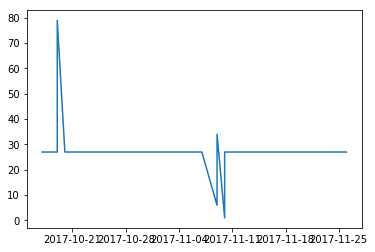

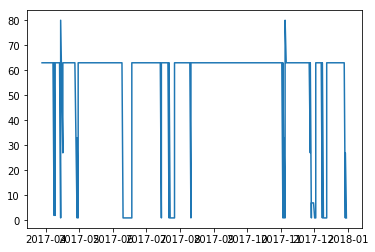

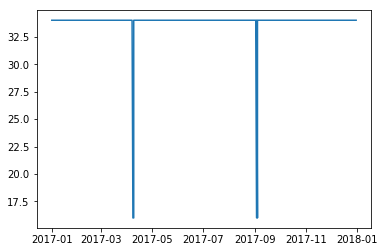

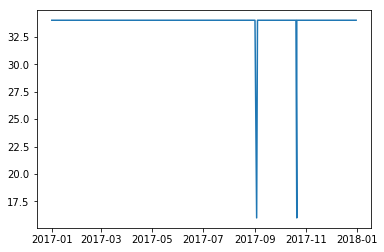

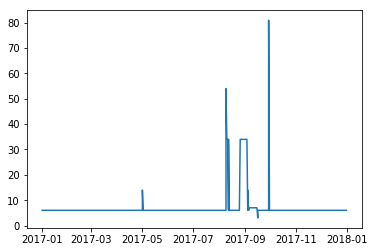

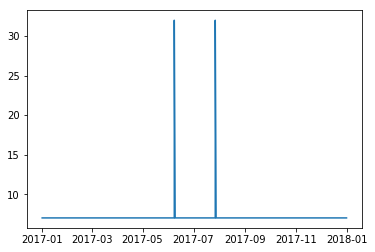

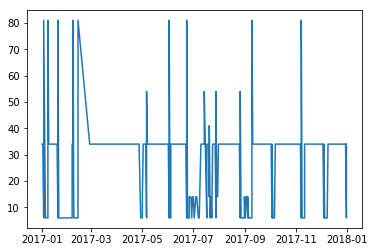

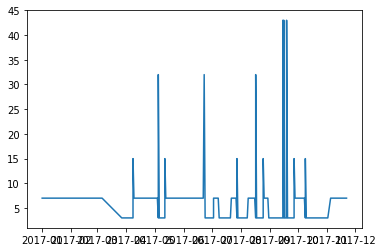

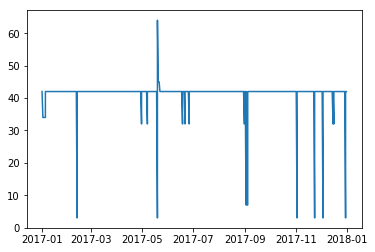

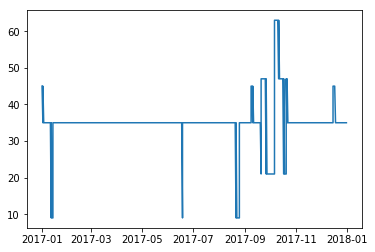

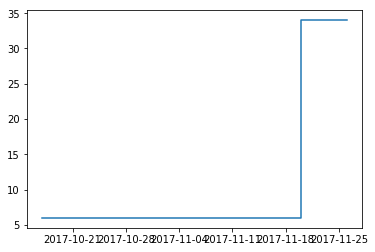

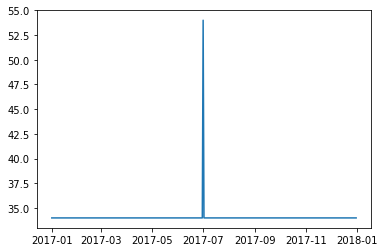

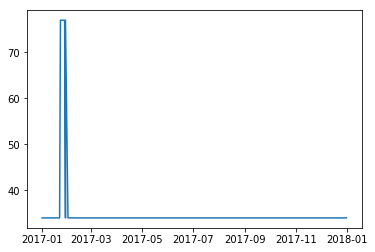

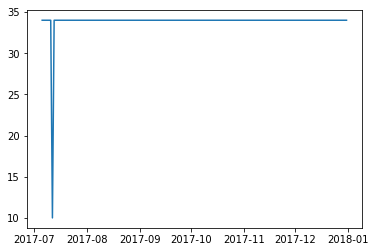

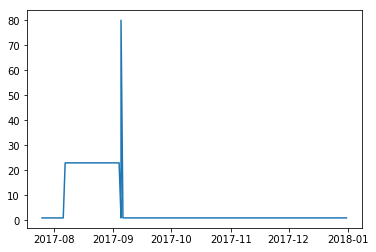

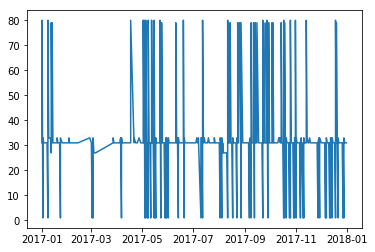

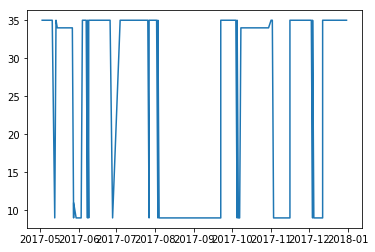

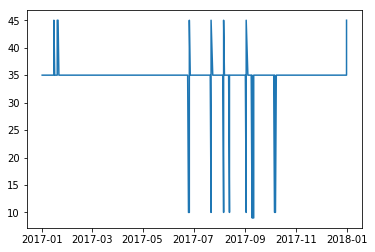

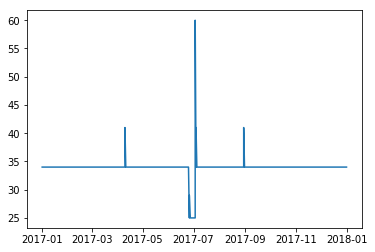

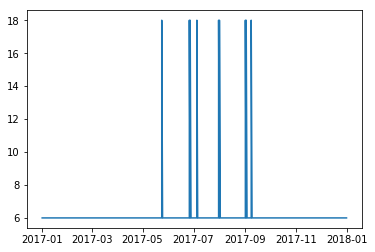

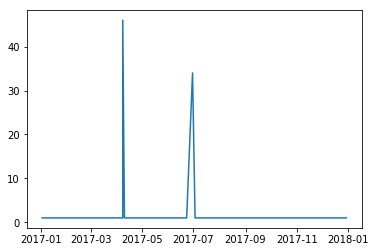

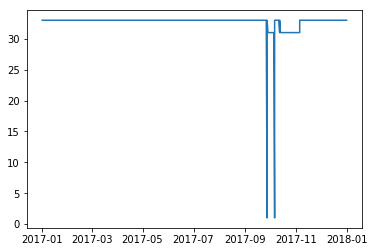

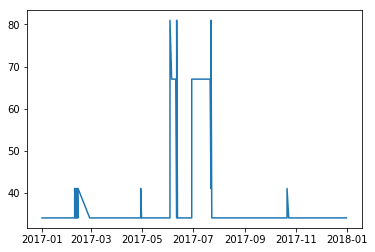

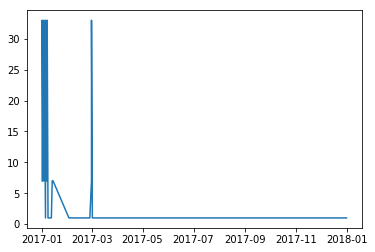

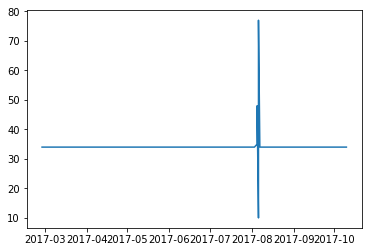

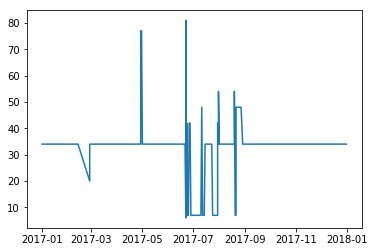

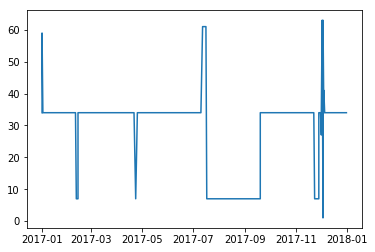

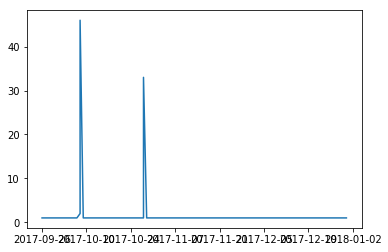

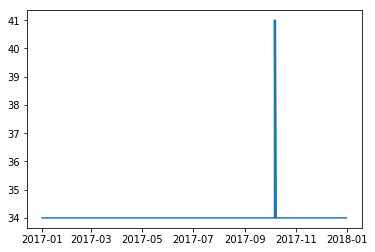

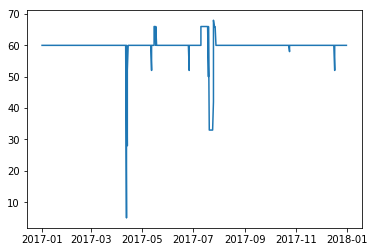

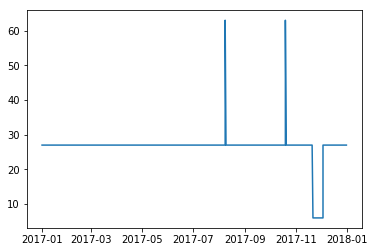

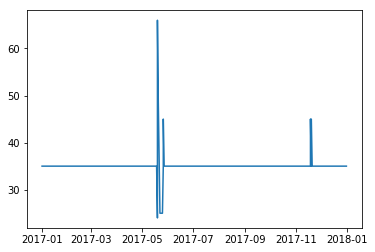

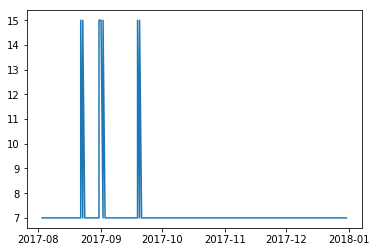

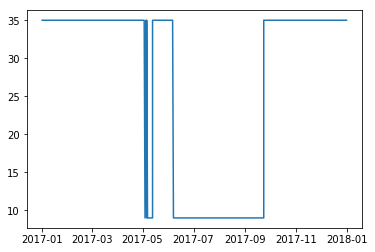

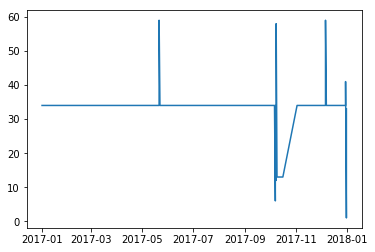

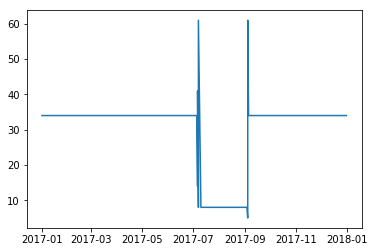

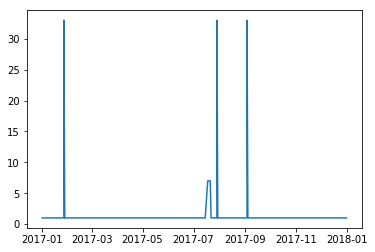

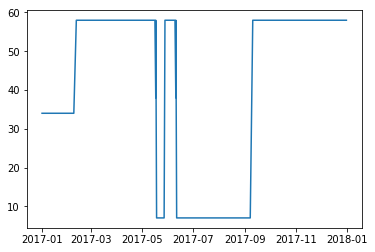

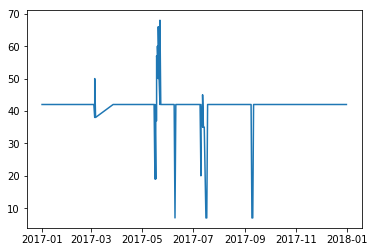

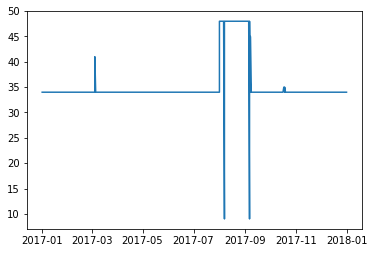

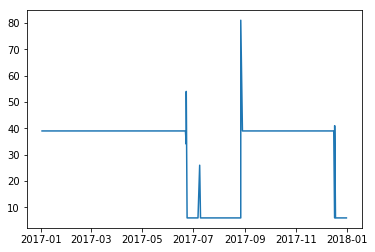

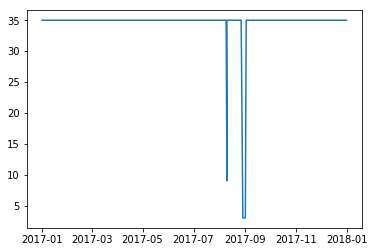

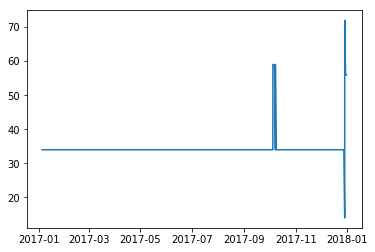

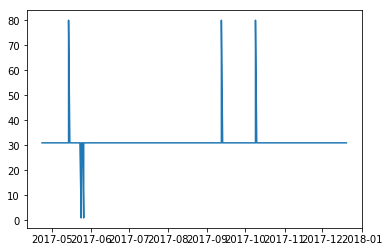

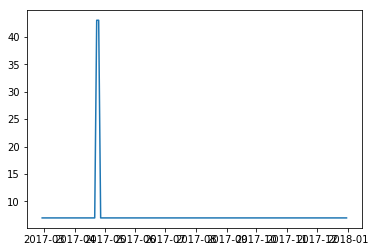

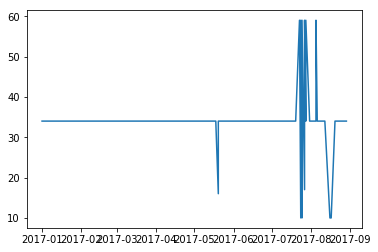

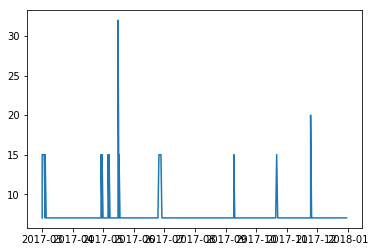

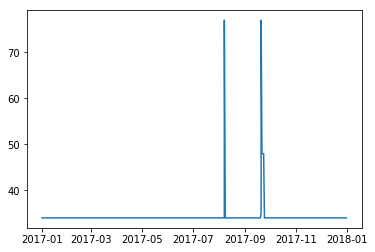

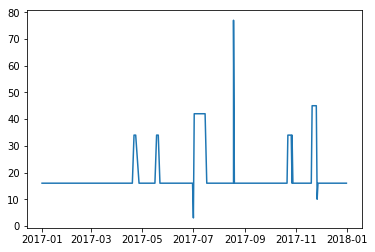

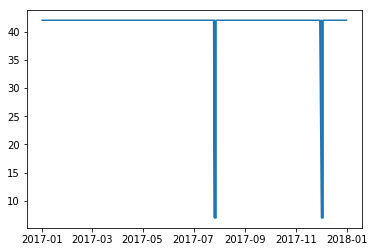

In [10]:
j = 0
for i in mobile:
    plt.plot(evening_location_main[i]['dates'],evening_location_main[i]['cities'])
    plt.show()
    j+=1
    if j == 50:
        break

In [11]:
for i in mobile:
    moved = [evening_location_main[i]['cities'][0]]
    date_moved = evening_location_main[i]['dates'][0]
    for j in range(1, len(evening_location_main[i]['cities'])):
        diff = np.timedelta64(evening_location_main[i]['dates'][j-1]-date_moved)
        diff = int(diff.astype('timedelta64[D]') / np.timedelta64(1, 'D'))
        if diff >=4 and evening_location_main[i]['cities'][j-1] != moved[-1]:
            moved.append(evening_location_main[i]['cities'][j-1])
            date_moved = evening_location_main[i]['dates'][j]
    evening_location_main[i]['moved'] = moved

In [12]:
low_mobility = []
medium_mobility = []
high_mobility = []
for i in mobile:
    if len(evening_location_main[i]['moved']) <=3:
        low_mobility.append(i)
    elif 2 < len(evening_location_main[i]['moved']) <=10:
        medium_mobility.append(i)
    else:
        high_mobility.append(i)

In [13]:
print ('There are {} refugees classed as low mobility'.format(len(low_mobility)))
print ('There are {} refugees classed as medium mobility'.format(len(medium_mobility)))
print ('There are {} refugees classed as high mobility'.format(len(high_mobility)))

There are 2737 refugees classed as low mobility
There are 5040 refugees classed as medium mobility
There are 4411 refugees classed as high mobility


In [14]:
bad_cities = np.zeros(81)

In [15]:
for i in mobile:
    moved = evening_location_main[i]['moved']
    unique, counts = np.unique(moved, return_counts=True)
    for j in range(len(unique)):
        # think about criterion for repeated city!!!
        if counts[j] == 1:
            bad_cities[unique[j]-1] += 1

In [16]:
city_mapping = pd.read_csv('./Mapping IDs/Dataset3_City_Mapping.csv')

In [17]:
bad_cities_names = {}

In [18]:
city_mapping = np.asarray(city_mapping)

In [19]:
for i in range(len(city_mapping)):
    bad_cities_names[city_mapping[i,1]] = bad_cities[i]

In [20]:
print ('The worst cities for refugees moving out of are:')
for i in bad_cities_names:
    if bad_cities_names[i] >=400:
        print i

The worst cities for refugees moving out of are:
KAHRAMANMARAS
GAZIANTEP
BALIKESIR
MERSIN
SAKARYA
YALOVA
CANAKKALE
KOCAELI
ANTALYA
AYDIN
ANKARA
ADANA
BOLU
MUGLA
TEKIRDAG
ISTANBUL
AFYON
BURSA
KONYA
IZMIR


In [32]:
with open("bad_cities.pkl", "wb") as fp:   # Unpickling
    pickle.dump(bad_cities, fp, 1)

In [21]:
with open("evening_location_main.pkl", "wb") as fp:
    pickle.dump(evening_location_main, fp, 1)